### Week-3 Assignment
# Car Price Prediction
#### Rana Karmakar
#### 17-10-2021

# Required Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [64]:
df = pd.read_csv("CarPrice_Assignment.csv")

# Dataset at a Glance

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Shape

In [4]:
df.shape

(205, 26)






# Check for Null values

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Statistical view

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Object Variables

In [7]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Columns

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [65]:
df=df.drop('CarName',axis='columns')

# Level Encode

In [66]:
label_encoder = preprocessing.LabelEncoder()
objList = df.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int32  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int32  
 14  cylindernumber    205 non-null    int32  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int32  
 1

# Feature Selection - Feature Importance

In [67]:
array = df.values
X = array[:,0:24]
Y = array[:,24]

Feature: 0, Score: -20.48446
Feature: 1, Score: 55.29815
Feature: 2, Score: 844.77984
Feature: 3, Score: 678.57048
Feature: 4, Score: -772.29616
Feature: 5, Score: -940.24752
Feature: 6, Score: 1040.49405
Feature: 7, Score: 10920.28066
Feature: 8, Score: 121.38275
Feature: 9, Score: -12.95527
Feature: 10, Score: 602.63571
Feature: 11, Score: 267.11005
Feature: 12, Score: 2.49964
Feature: 13, Score: 223.66441
Feature: 14, Score: 24.01456
Feature: 15, Score: 87.95350
Feature: 16, Score: 72.60758
Feature: 17, Score: -1290.36152
Feature: 18, Score: -2692.76775
Feature: 19, Score: 182.59694
Feature: 20, Score: 26.02660
Feature: 21, Score: 1.48895
Feature: 22, Score: -78.75726
Feature: 23, Score: 104.37270


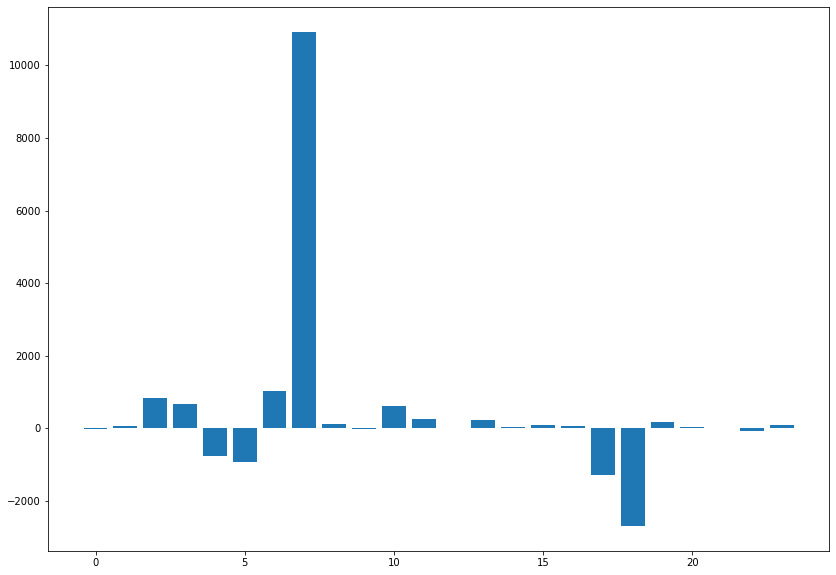

In [68]:
model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(14, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Removeing the Unwanted Columns

In [69]:
#df['car_ID', 'symboling', 'fueltype',  'doornumber', 'carbody', 'enginelocation', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [70]:
df=df.drop('fueltype',axis='columns')
df=df.drop('doornumber',axis='columns')
df=df.drop('carbody',axis='columns')
df=df.drop('carlength',axis='columns')
df=df.drop('boreratio',axis='columns')
df=df.drop('stroke',axis='columns')
df=df.drop('citympg',axis='columns')
#df = df.drop(columns=["fueltype","doornumber","carbody","carlength","boreratio","stroke","citympg"])

In [71]:
df.columns

Index(['car_ID', 'symboling', 'aspiration', 'drivewheel', 'enginelocation',
       'wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'price'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   aspiration        205 non-null    int32  
 3   drivewheel        205 non-null    int32  
 4   enginelocation    205 non-null    int32  
 5   wheelbase         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginetype        205 non-null    int32  
 10  cylindernumber    205 non-null    int32  
 11  enginesize        205 non-null    int64  
 12  fuelsystem        205 non-null    int32  
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  highwaympg        205 non-null    int64  
 1

In [73]:
df

,car_ID,symboling,aspiration,drivewheel,enginelocation,wheelbase,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,compressionratio,horsepower,peakrpm,highwaympg,price
0,1,3,0,2,0,88.6,64.1,48.8,2548,0,2,130,5,9.0,111,5000,27,13495.0
1,2,3,0,2,0,88.6,64.1,48.8,2548,0,2,130,5,9.0,111,5000,27,16500.0
2,3,1,0,2,0,94.5,65.5,52.4,2823,5,3,152,5,9.0,154,5000,26,16500.0
3,4,2,0,1,0,99.8,66.2,54.3,2337,3,2,109,5,10.0,102,5500,30,13950.0
4,5,2,0,0,0,99.4,66.4,54.3,2824,3,1,136,5,8.0,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,2,0,109.1,68.9,55.5,2952,3,2,141,5,9.5,114,5400,28,16845.0
201,202,-1,1,2,0,109.1,68.8,55.5,3049,3,2,141,5,8.7,160,5300,25,19045.0
202,203,-1,0,2,0,109.1,68.9,55.5,3012,5,3,173,5,8.8,134,5500,23,21485.0
203,204,-1,1,2,0,109.1,68.9,55.5,3217,3,3,145,3,23.0,106,4800,27,22470.0


# Data Visualization - Interaction Between Variables

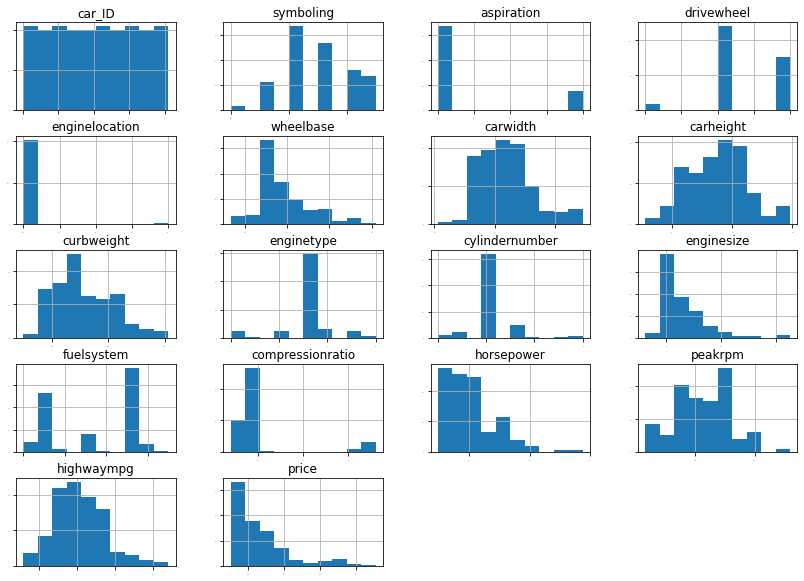

In [52]:
#plt.figure(figsize=(14, 10))
df.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1,figsize=(14, 10))
plt.show()

# Scatter Plot

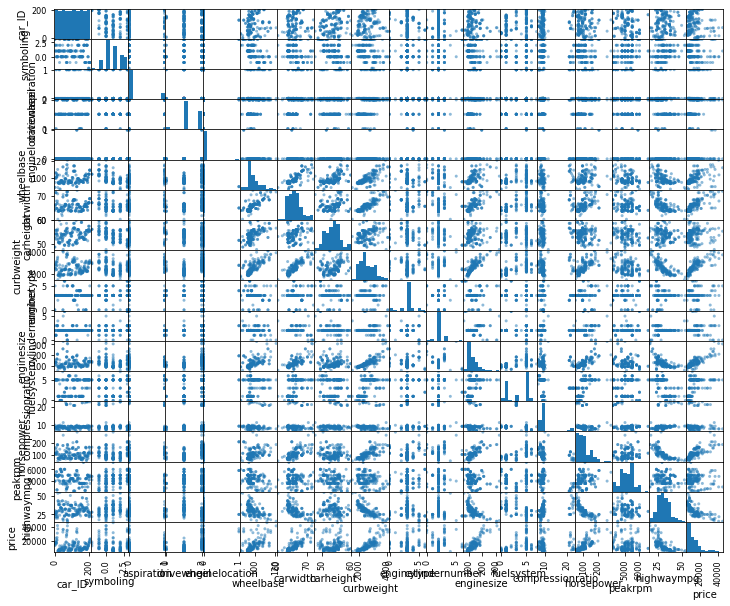

In [53]:
#plt.figure(figsize=(14, 10))
scatter_matrix(df,figsize=(12, 10))
plt.show()

# Correlation Plot

Text(0.5, 1.0, 'Correlation Matrix')

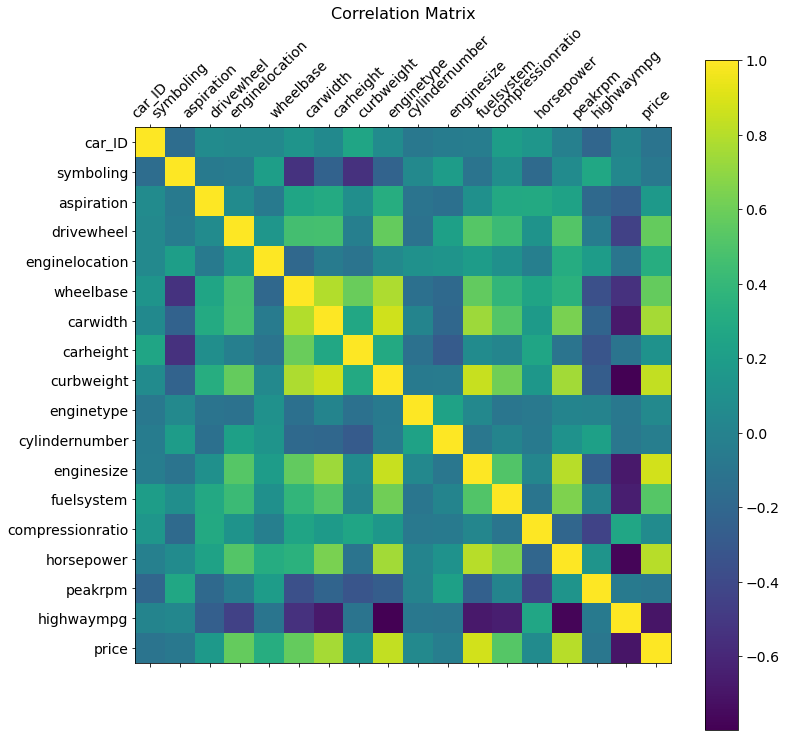

In [54]:
f = plt.figure(figsize=(12, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Distribution of Price

<AxesSubplot:ylabel='Count'>

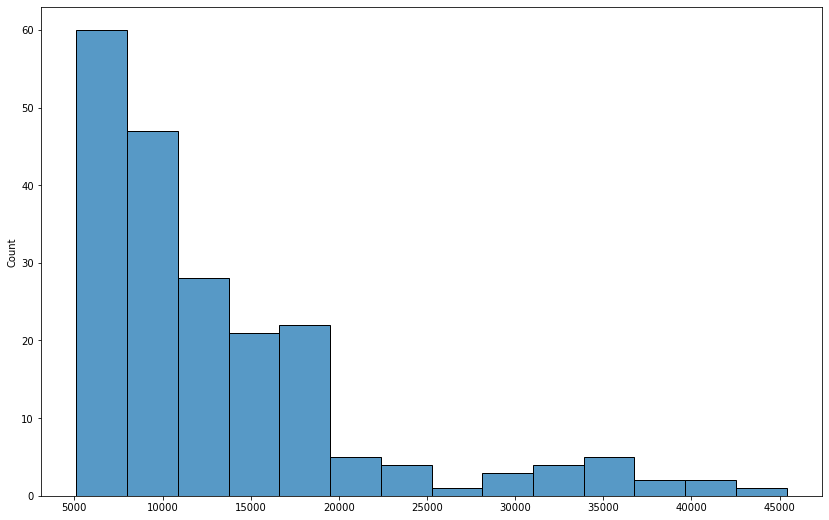

In [55]:
plt.figure(figsize=(14, 9))
sns.histplot(data=Y)

# Wheelbase

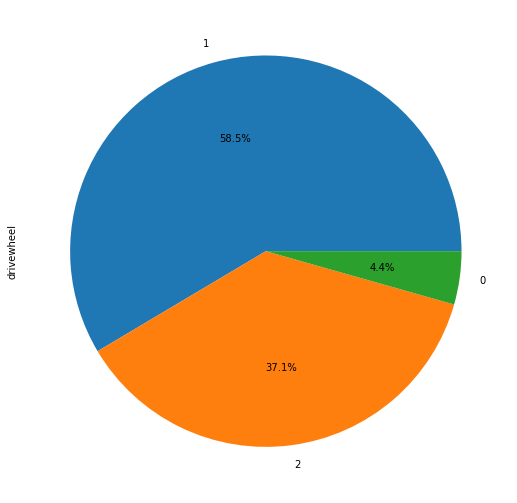

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(14, 9))
df.drivewheel.value_counts().plot.pie(subplots=True,autopct='%1.1f%%', figsize = (15,7.5))
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

# Relation Between drivewheel and Price

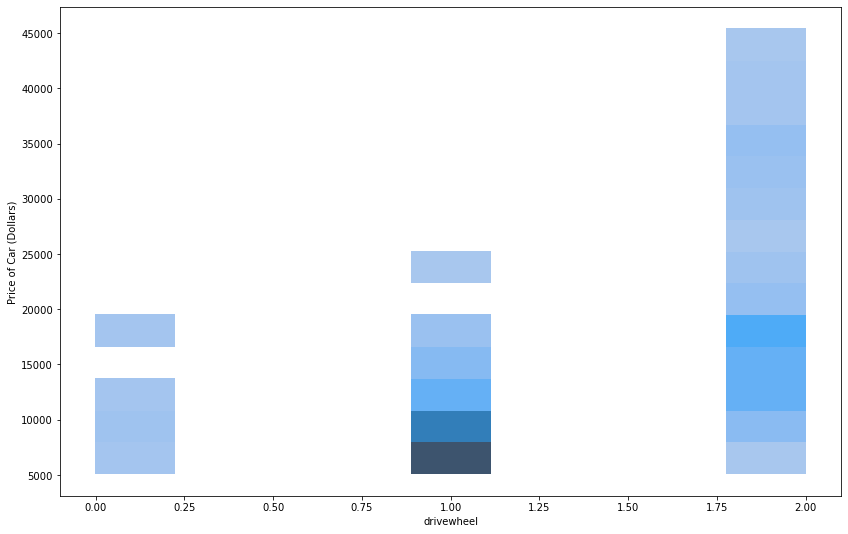

In [57]:
plt.figure(figsize=(14, 9))
plt1 = sns.histplot(x = 'drivewheel', y = 'price', data = df)
plt1.set_xlabel('drivewheel')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# Train Test Split

In [74]:
X = df.drop(columns='price')
Y = df['price']
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_std = scaler.transform(X_train)
print(x_train_std.std())

1.0


In [76]:
X_train = x_train_std

In [77]:
scaler.transform(X_test).std()

0.9775005680192559

## Test options and evaluation metric

In [63]:
'''# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
  LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
  Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
  ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
  KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
  DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)'''

'# Standardize the dataset\npipelines = []\npipelines.append((\'ScaledLR\', Pipeline([(\'Scaler\', StandardScaler()),(\'LR\',\n  LinearRegression())])))\npipelines.append((\'ScaledLASSO\', Pipeline([(\'Scaler\', StandardScaler()),(\'LASSO\',\n  Lasso())])))\npipelines.append((\'ScaledEN\', Pipeline([(\'Scaler\', StandardScaler()),(\'EN\',\n  ElasticNet())])))\npipelines.append((\'ScaledKNN\', Pipeline([(\'Scaler\', StandardScaler()),(\'KNN\',\n  KNeighborsRegressor())])))\npipelines.append((\'ScaledCART\', Pipeline([(\'Scaler\', StandardScaler()),(\'CART\',\n  DecisionTreeRegressor())])))\npipelines.append((\'ScaledSVR\', Pipeline([(\'Scaler\', StandardScaler()),(\'SVR\', SVR())])))\nresults = []\nnames = []\nfor name, model in pipelines:\n  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)\n  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)\n  results.append(cv_results)\n  names.append(name)\n  msg = "%s: %f (%f)" % (name, cv_results.mea

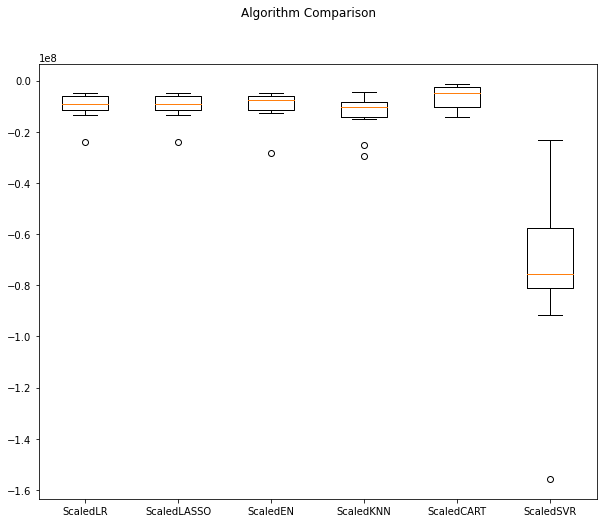

In [78]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [79]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


## Spot-Check Algorithms

In [80]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

## Evaluate Models
Here we got Mean Squard Error and observe that Decision Tree has minimun MSE value

In [81]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -10175818.254955 (5407038.763141)
LASSO: -10158462.778867 (5404726.623432)
EN: -10366615.616737 (6530563.505421)
KNN: -12563558.506063 (8205334.114248)
CART: -6249878.850827 (4180292.584291)
SVR: -73273560.699519 (35265036.231949)


## Compare Algorithms

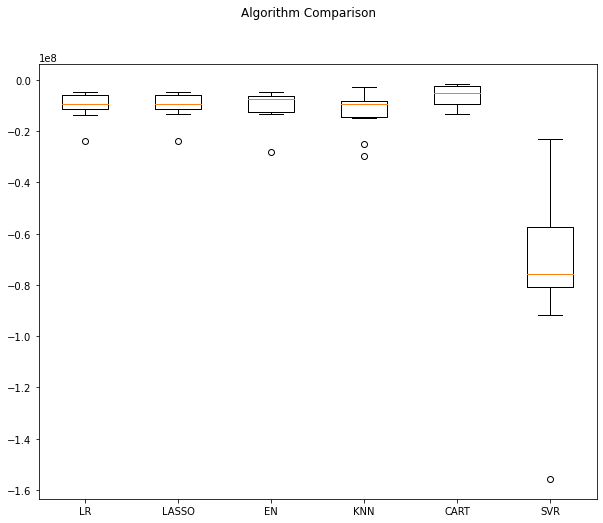

In [82]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Standardize the Dataset
Here we got Mean Squard Error and observe that Decision Tree has minimun MSE value

## Compare Algorithms

In [83]:
smodel=[LinearRegression(),Lasso(),ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor(),SVR()]

In [84]:
for i in smodel:
    i.fit(X_train,Y_train)
    pred=i.predict(X_test)
    #print(mean_squared_error(Y_test, pred))
    print('Model :',i,i.score(X_test,Y_test))

Model : LinearRegression() -915681.9283720426
Model : Lasso() -904757.4004924706
Model : ElasticNet() -210447.90995624193
Model : KNeighborsRegressor() -2.358899374702345
Model : DecisionTreeRegressor() -8.26777916501747
Model : SVR() -0.10398908370632842


# Finalize the Model

In [85]:
LinearRegression().fit(X_train, Y_train).score(X_test,Y_test)*100

-91568192.83720426

In [38]:
KNeighborsRegressor().fit(X_train, Y_train).score(X_test,Y_test)*100

-235.88993747023449

In [39]:
KNeighborsRegressor().fit(X_train, Y_train).score(X_test,Y_test)*100

-235.88993747023449

# Conclution


The Best Model gives 93.66% Accuracy